In [ ]:
!pip install git+https://github.com/fastai/fastcore > /dev/null
!pip install git+https://github.com/fastai/fastai2 > /dev/null
!pip install iterative-stratification > /dev/null

  Running command git clone -q https://github.com/fastai/fastcore /tmp/pip-req-build-nfboo51i
  Running command git clone -q https://github.com/fastai/fastai2 /tmp/pip-req-build-e_fxps2b


In [ ]:
from fastai2.vision.all import *

# Single-label classification

1. Get the data(untar_data)
2. Use get_mage_files function to get the images located in the path specified above
3. Use ImageDataLoaders and they should be used with any one of the factory methods specified.
4. Get a glance of the dataset.

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
import os
os.listdir(path)

['annotations', 'images']

get_image_files is a function that helps to grab all the images(recursively) in one folder i.e, (only in folder)

In [ ]:
get_image_files??

In [ ]:
files = get_image_files(path,recurse=True,folders='images')
len(files)

7390

In [ ]:
os.listdir(os.path.join(path/'images'))[6]

'havanese_147.jpg'

In [ ]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_100.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_147.jpg'))

In [ ]:
def label_func(f):
  return f[0].isupper()

To get our data ready for a model, we need to put it in a DataLoaders object. Here we have a function that labels using the file names, so we will use ImageDataLoaders.from_name_func. There are other factory methods of ImageDataLoaders that could be more suitable for your problem, so make sure to check them all in vision.data.

In [ ]:
dls = ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(224))

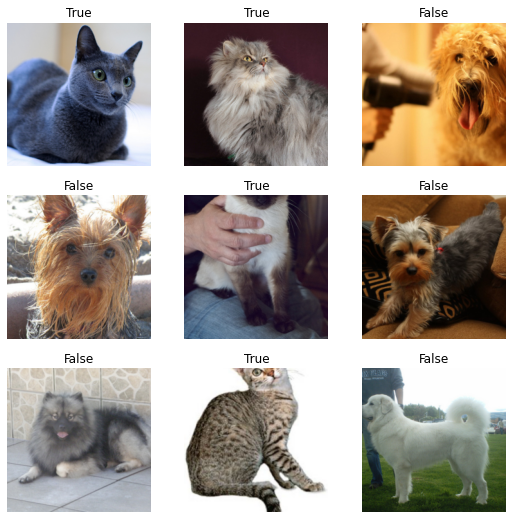

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.167575,0.014001,0.003383,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.059663,0.014120,0.004736,01:08


In [ ]:
learn.predict(files[0])

('True', tensor(1), tensor([2.6552e-08, 1.0000e+00]))

The predict method returns three things: the decoded prediction (here False for dog), the index of the predicted class and the tensor of probabilities that our image is one of a dog (here the model is quite confident!) This method accepts a filename, a PIL image or a tensor directly in this case.

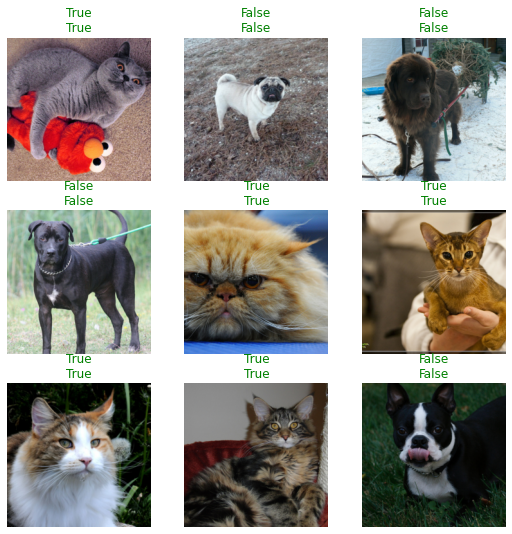

In [ ]:
learn.show_results()

# Classifying Breeds

In [ ]:
files[0]

Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_100.jpg')

In [ ]:
files[0].name

'Bengal_100.jpg'

In [ ]:
pat = r'^(.*)_\d+.jpg' # Regular Expressions

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

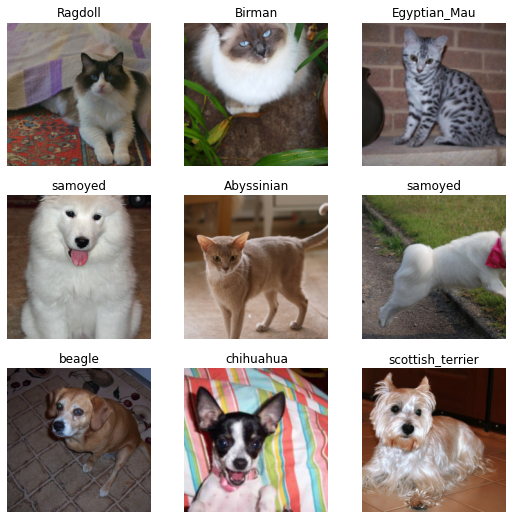

In [ ]:
dls.show_batch()

In [ ]:
dls = ImageDataLoaders.from_name_re(
    path, files, pat, item_tfms=Resize(460)
    ,batch_tfms=aug_transforms(size=224)
    )

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.004365158267319202)

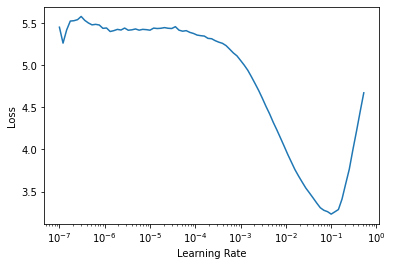

In [24]:
learn.lr_find()

In [25]:
learn.fine_tune(1, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.309416,0.309198,0.099459,01:22


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


epoch,train_loss,valid_loss,error_rate,time
0,0.459045,0.308132,0.091340,01:28
1,0.436091,0.317133,0.090663,01:27
2,0.266707,0.231199,0.069689,01:28
3,0.152966,0.190172,0.061570,01:28


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


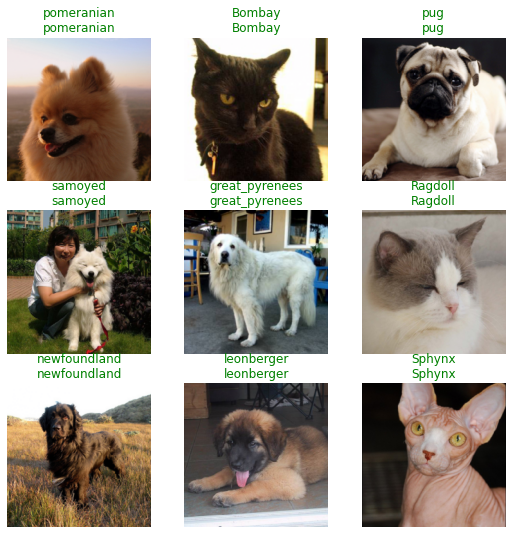

In [28]:
learn.show_results()

In [29]:
interp =  Interpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


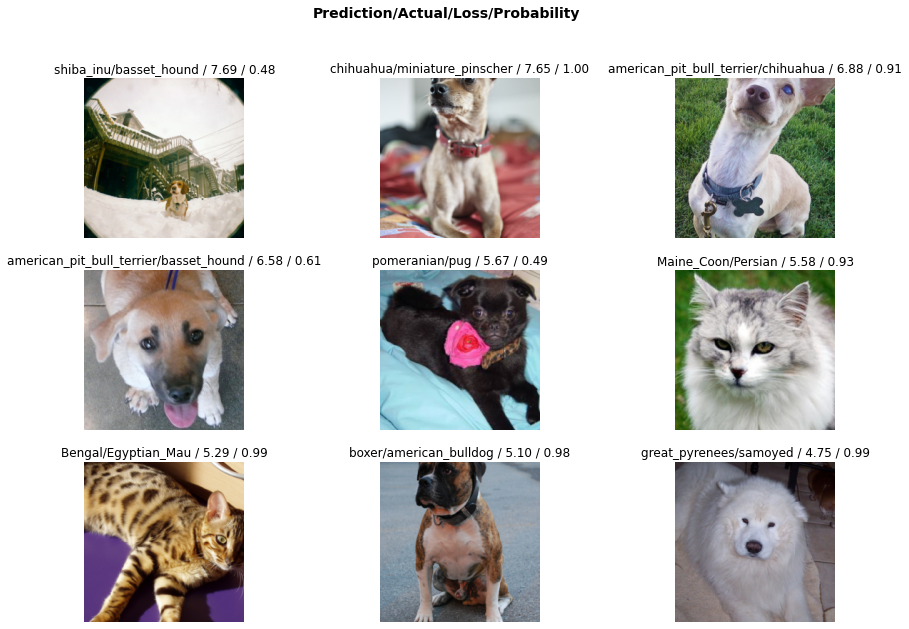

In [30]:
interp.plot_top_losses(9,figsize=(15,10))

#  With the Data block API

In [31]:
pets = DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size=224)
                 )

The pets object by itself is empty: it only containes the functions that will help us gather the data. We have to call dataloaders method to get a DataLoaders. We pass it the source of the data:

In [37]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images")

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


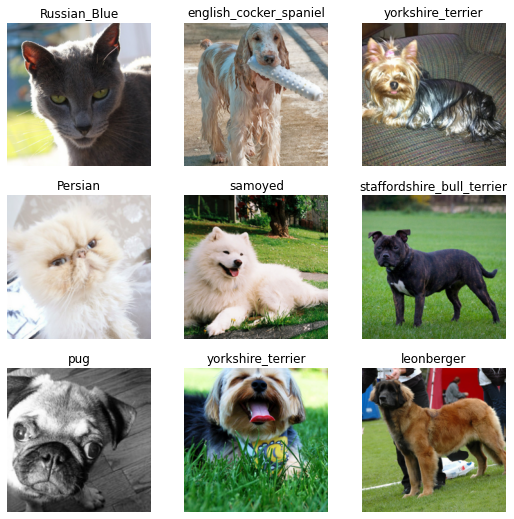

In [38]:
dls.show_batch()